In [131]:
import netCDF4
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [132]:
url='http://opendap.renci.org:1935/thredds/dodsC/Test/fort.61.nc'
var_name='zeta'
nc=netCDF4.Dataset(url)
print nc.variables.keys()

[u'time', u'station_name', u'x', u'y', u'zeta']


In [144]:
time=nc.variables['time']
var=nc.variables[var_name]
dtime = netCDF4.num2date(time[:],time.units)
tstart=dtime[0].strftime('%Y-%b-%d')
tstr=nc.comments
#print tstr
sn=nc.variables['station_name']
lstr=[]
for i in range(sn.shape[0]) :
    temp=sn[i,:].tostring()
    temp=temp.strip('\x00')  # gets rid of some garbage in the strings
    lstr.append(temp)

for p in lstr: print p

8651370 Duck Pier                                 
8652587 Oregon Inlet Marina                       
8654467 USCG Hatteras                             
8656483 Beaufort                                  
8658163 Atlantic Coast at J. Mercer Pier at Wright
8659897 Sunset Beach                              


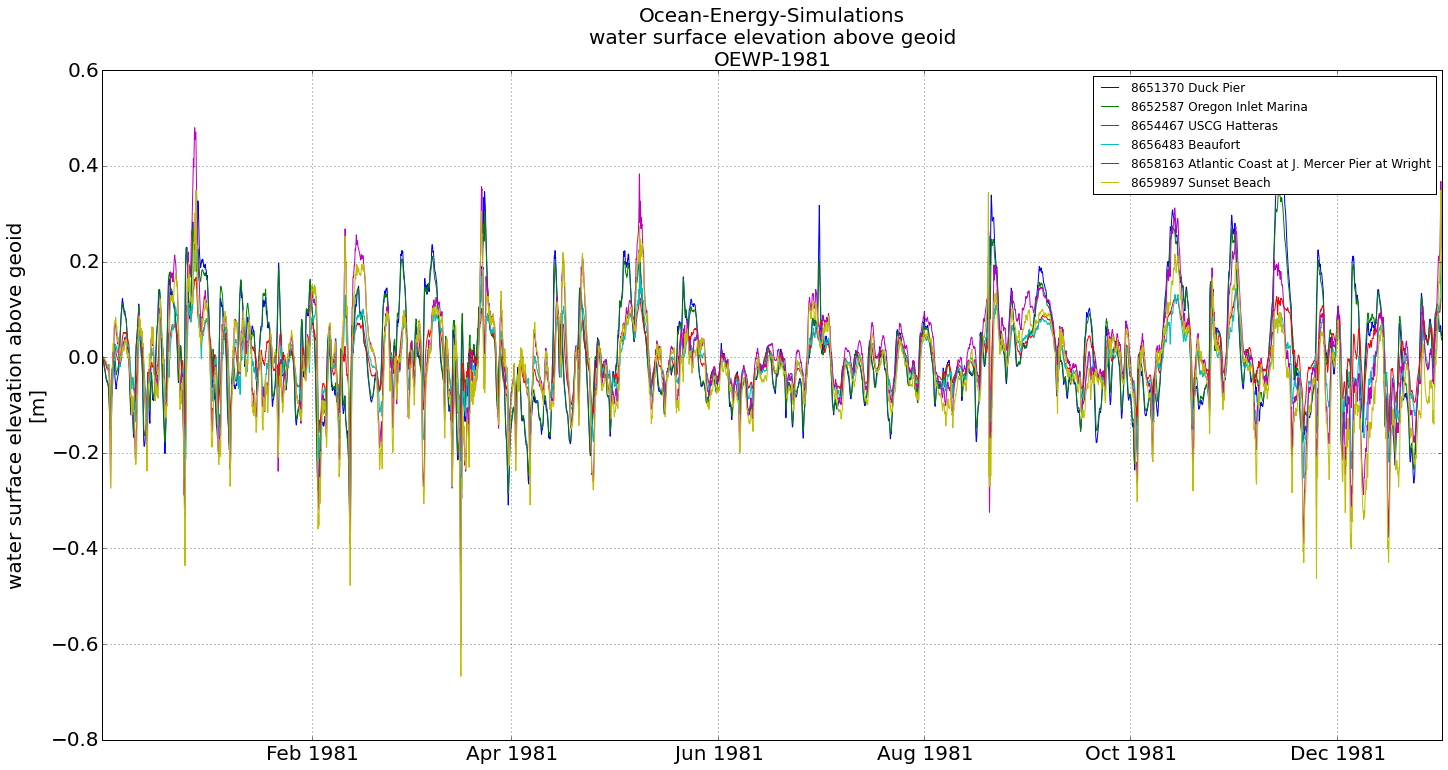

In [140]:
fig = plt.figure(figsize=(24,12), dpi=144)
pc=plt.plot(dtime,zeta)
plt.title("%s\n%s\n%s" % (nc.title, var.long_name, tstr), fontsize=20)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.ylabel("%s\n[%s]" % (var.long_name, var.units), fontsize=20)
plt.legend(lstr)